In [23]:
import os

import itertools
import collections

import pandas as pd
import matplotlib.pyplot as plt

import community
import networkx as nx

In [24]:
df_allegations = pd.read_csv('results_victimrace_officer_allegations.csv')

In [25]:
df_allegations.head()

,allegation_id,officer_id,final_outcome,allegation,victim_race
0,27716,22414,No Action Taken,Illegal Arrest / False Arrest,Not found
1,27716,22414,No Action Taken,Illegal Arrest / False Arrest,Not found
2,27716,9389,No Action Taken,Illegal Arrest / False Arrest,Not found
3,27716,9389,No Action Taken,Illegal Arrest / False Arrest,Not found
4,27716,7423,No Action Taken,Illegal Arrest / False Arrest,Not found


In [26]:
df_allegations = df_allegations[df_allegations['victim_race'] == 'White']

In [27]:
df_allegations.head()

,allegation_id,officer_id,final_outcome,allegation,victim_race
56,27724,28481,No Action Taken,Illegal Arrest / False Arrest,White
57,27724,28481,No Action Taken,Illegal Arrest / False Arrest,White
58,27724,3097,No Action Taken,Illegal Arrest / False Arrest,White
59,27724,3097,No Action Taken,Illegal Arrest / False Arrest,White
60,27724,8287,No Action Taken,Illegal Arrest / False Arrest,White


In [28]:
len(df_allegations)

12638

In [29]:
df_officer_allegations = df_allegations[['officer_id', 'allegation']]

In [30]:
df_officer_allegations = df_officer_allegations.groupby('officer_id')['allegation'].apply(list)

In [31]:
def generate_edges(list_of_alleg):
    return [(list_of_alleg[i], list_of_alleg[i+1])for i in range(0,len(list_of_alleg)-1)]

In [32]:
edges = []

for row in df_officer_allegations:
    count = len(row)
    if count > 1:
        edges.extend(generate_edges(row))

In [33]:
edges

[('Unnecessary Display Of Weapon / On Duty',
  'Unnecessary Display Of Weapon / On Duty'),
 ('Unnecessary Display Of Weapon / On Duty',
  'Unnecessary Display Of Weapon / On Duty'),
 ('Unnecessary Display Of Weapon / On Duty',
  'Unnecessary Display Of Weapon / On Duty'),
 ('Unnecessary Display Of Weapon / On Duty',
  'Unnecessary Display Of Weapon / On Duty'),
 ('Unnecessary Display Of Weapon / On Duty',
  'Unnecessary Display Of Weapon / On Duty'),
 ('Unnecessary Display Of Weapon / On Duty',
  'Domestic Altercation - Physical Abuse'),
 ('Domestic Altercation - Physical Abuse',
  'Domestic Altercation - Physical Abuse'),
 ('Domestic Incident - Not Physical', 'Domestic Incident - Not Physical'),
 ('Inadequate / Failure To Provide Service',
  'Inadequate / Failure To Provide Service'),
 ('Use Of Profanity', 'Neglect Of Duty'),
 ('Neglect Of Duty', 'Neglect Of Duty'),
 ('Unnecessary Display Of Weapon / Off Duty',
  'Unnecessary Display Of Weapon / Off Duty'),
 ('Unnecessary Display Of W

In [34]:
len(edges), len(set(edges))

(7892, 947)

In [35]:
edge_counts = collections.Counter(edges)

In [36]:
len(edge_counts)

947

In [37]:
df_edges = pd.DataFrame.from_dict(edge_counts, columns=['Edge Frequency'], orient='index')

In [38]:
df_edges.head()

,Edge Frequency
"(Unnecessary Display Of Weapon / On Duty, Unnecessary Display Of Weapon / On Duty)",70
"(Unnecessary Display Of Weapon / On Duty, Domestic Altercation - Physical Abuse)",1
"(Domestic Altercation - Physical Abuse, Domestic Altercation - Physical Abuse)",350
"(Domestic Incident - Not Physical, Domestic Incident - Not Physical)",255
"(Inadequate / Failure To Provide Service, Inadequate / Failure To Provide Service)",524


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efbca417668>]], dtype=object)

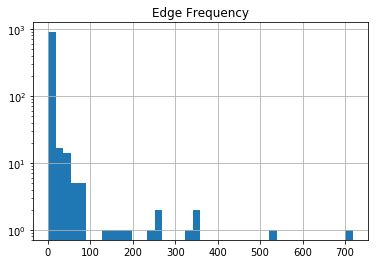

In [39]:
df_edges.hist(bins=40, log=True)

In [40]:
G = nx.Graph()

In [41]:
nodes = dict()

for row in set(edges):
    if row[0] not in nodes:
        nodes[row[0]] = len(nodes)
        G.add_node(nodes[row[0]], name=row[0])
    if row[1] not in nodes:
        nodes[row[1]] = len(nodes)
        G.add_node(nodes[row[1]], name=row[1])
    G.add_edge(nodes[row[0]], nodes[row[1]], weight=float(edge_counts[row]))

In [42]:
len(nodes)

101

In [43]:
len(G.edges)

725

In [44]:
partition = community.best_partition(G, weight='weight')

AttributeError: module 'community' has no attribute 'best_partition'

In [ ]:
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 30,
                                node_color = str(count / size))


nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [ ]:
community.modularity(partition, G)

In [ ]:
len(partition.values())

In [ ]:
communities = { i : [] for i in range(0,40) }

[communities[community].append(G.node[node]['name']) for node, community in enumerate(partition.values())]

In [ ]:
communities

In [ ]:
community.best_partition
